In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\train.csv")
test = pd.read_csv(r"D:\test.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          334 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        92 non-null     object 
 11  Embarked     416 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.2+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   417.000000  417.000000  417.000000  334.000000  417.000000   
mean    209.000000    0.388489    2.340528   28.711826    0.594724   
std     120.521782    0.48799

## Data Understandinng

1.PassengerId:=> Unique identifier for each passenger.

2.Survived:=> Indicates whether the passenger survived (1) or not (0).

3.Pclass:=> Ticket class (1st, 2nd, or 3rd class).

4.Name:=> Name of the passenger.

5.Sex:=> Gender of the passenger.

6.Age:=> Age of the passenger.

7.SibSp:=> Number of siblings/spouses aboard.

8.Parch:=> Number of parents/children aboard.

9.Ticket:=> Ticket number.

10.Fare:=> Passenger fare.

11.Cabin:=> Cabin number.

12.Embarked:=> Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## DataSet Understanding

In [6]:
data.shape

(417, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          334 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        92 non-null     object 
 11  Embarked     416 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.2+ KB


In [8]:
data.nunique()

PassengerId    417
Survived         2
Pclass           3
Name           417
Sex              2
Age             72
SibSp            7
Parch            6
Ticket         355
Fare           173
Cabin           73
Embarked         3
dtype: int64

In [9]:
print(data.Survived.value_counts())

0    255
1    162
Name: Survived, dtype: int64


In [10]:
continuous_variables = []
discrete_categorical_variables = []
discrete_count_variables = []

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        if len(data[column].unique()) > 20:
            continuous_variables.append(column)
        else:
            if len(data[column].unique()) <= 10:
                discrete_count_variables.append(column)
            else:
                discrete_categorical_variables.append(column)
    elif data[column].dtype == 'object':
        discrete_categorical_variables.append(column)

print("Continuous Variables:",continuous_variables)
print("Discrete Categorical Variables:", discrete_categorical_variables)
print("Discrete Count Variables:", discrete_count_variables)

Continuous Variables: ['PassengerId', 'Age', 'Fare']
Discrete Categorical Variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Discrete Count Variables: ['Survived', 'Pclass', 'SibSp', 'Parch']


In [11]:
# continuous_variables = []

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        if len(data[column].unique()) > 20:
            continuous_variables.append(column)
continuous_variable_stats = data[continuous_variables].describe()

print("Continuous Variables:")
print(continuous_variable_stats)

Continuous Variables:
       PassengerId         Age        Fare  PassengerId         Age  \
count   417.000000  334.000000  417.000000   417.000000  334.000000   
mean    209.000000   28.711826   32.568374   209.000000   28.711826   
std     120.521782   14.159463   49.378042   120.521782   14.159463   
min       1.000000    0.830000    0.000000     1.000000    0.830000   
25%     105.000000   20.000000    7.925000   105.000000   20.000000   
50%     209.000000   28.000000   14.454200   209.000000   28.000000   
75%     313.000000   36.875000   31.000000   313.000000   36.875000   
max     417.000000   71.000000  512.329200   417.000000   71.000000   

             Fare  
count  417.000000  
mean    32.568374  
std     49.378042  
min      0.000000  
25%      7.925000  
50%     14.454200  
75%     31.000000  
max    512.329200  


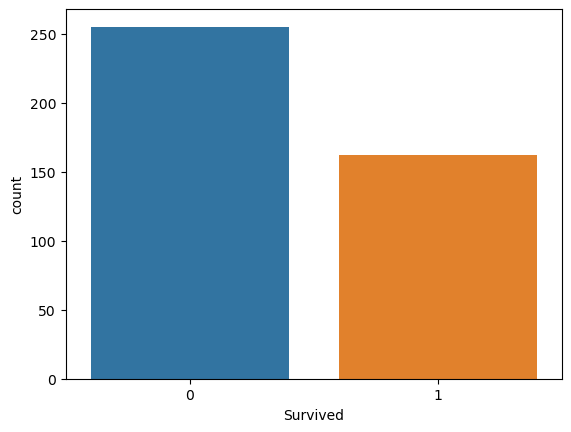

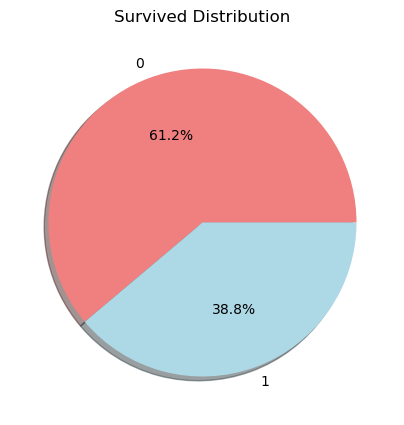

In [12]:
sns.countplot(x=data.Survived)

churn_distribution = data['Survived'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], shadow=True)
plt.title('Survived Distribution')
plt.show()

In [13]:
print((data['Pclass'].value_counts()/891)*100)



3    26.487093
1    10.549944
2     9.764310
Name: Pclass, dtype: float64


0.36733655836762213
0.2415506185802445


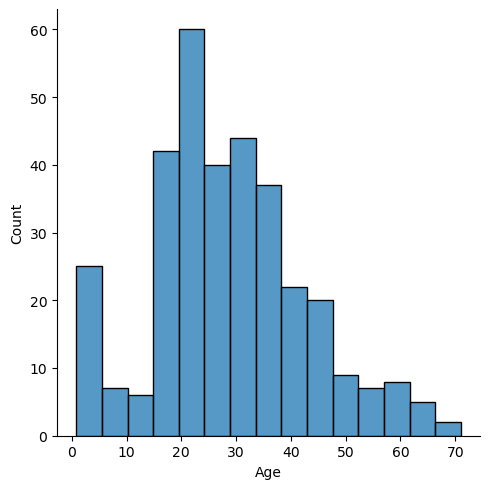

In [14]:
sns.displot(data['Age'])

print(data['Age'].skew())

print(data['Age'].kurt())


<Axes: >

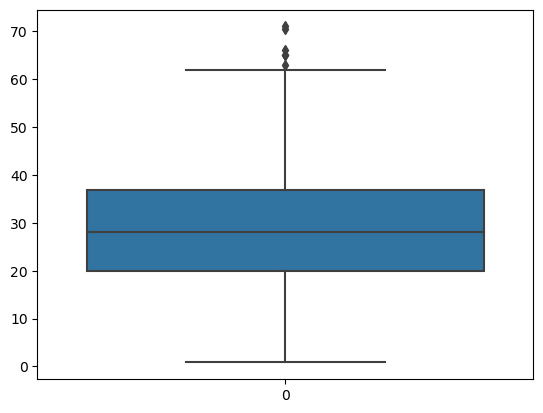

In [15]:
sns.boxplot(data['Age'])

In [16]:
child_age_threshold = 12
adult_age_threshold = 18
old_age_threshold = 60

# Categorize individuals based on age
data['Age_Category'] = pd.cut(data['Age'],
                                      bins=[0, child_age_threshold, adult_age_threshold, old_age_threshold, data['Age'].max()],
                                      labels=['Child', 'Young', 'Adult', 'Old'])

# Print the count of individuals in each category
print(data['Age_Category'].value_counts())


Adult    260
Child     34
Young     31
Old        9
Name: Age_Category, dtype: int64


4.290444958656509
27.150102184602265


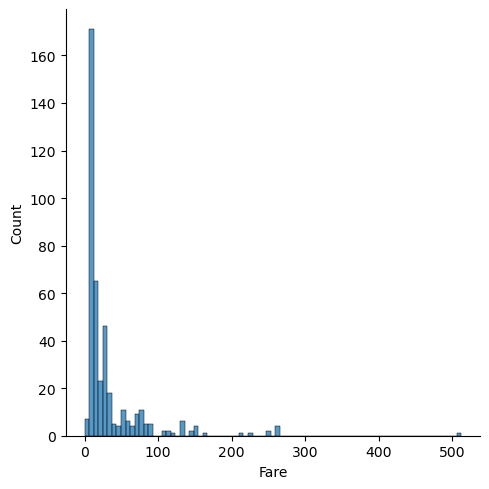

In [17]:
sns.displot(data['Fare'])

print(data['Fare'].skew())

print(data['Fare'].kurt())


<Axes: >

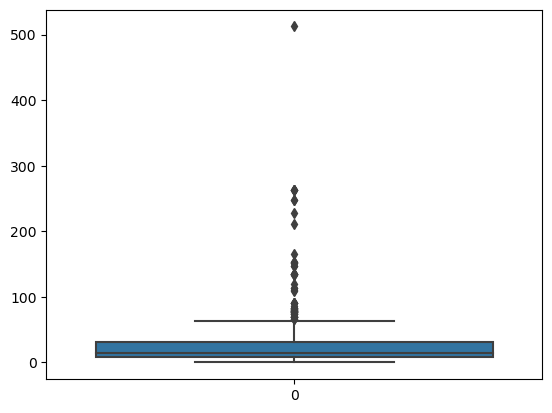

In [18]:
sns.boxplot(data['Fare'])

Survived     0     1
Pclass              
1         41.5  58.5
2         56.3  43.7
3         70.8  29.2


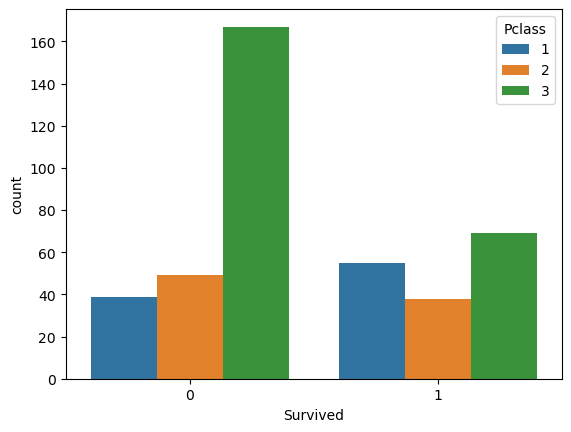

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=data)

# Calculate the percentage of survivors in each class
cross_tab = pd.crosstab(data['Pclass'], data['Survived'])
percentages = cross_tab.apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

# Display the percentages
print(percentages)

# Show the plot
plt.show()


Survived     0     1
Sex                 
female    25.2  74.8
male      83.3  16.7


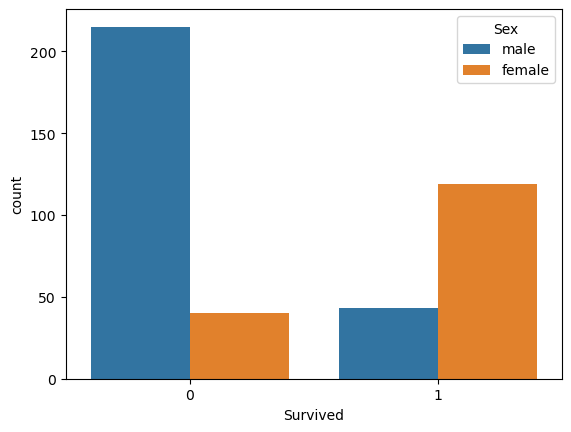

In [20]:
sns.countplot(x='Survived', hue='Sex', data=data)

# Calculate the percentage of survivors for each gender
cross_tab_sex = pd.crosstab(data['Sex'], data['Survived'])
percentages_sex = cross_tab_sex.apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

# Display the percentages
print(percentages_sex)

# Show the plot
plt.show()


Survived     0     1
Embarked            
C         48.8  51.2
Q         43.9  56.1
S         67.1  32.9


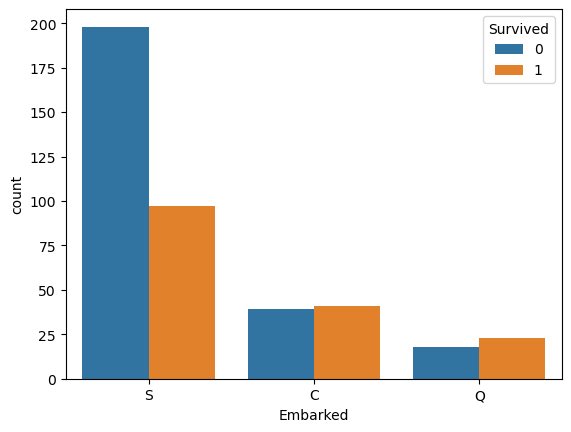

In [21]:
sns.countplot(x='Embarked', hue='Survived', data=data)

# Calculate the percentage of survivors for each embarkation point
cross_tab_embarked = pd.crosstab(data['Embarked'], data['Survived'])
percentages_embarked = cross_tab_embarked.apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

# Display the percentages
print(percentages_embarked)

# Show the plot
plt.show()


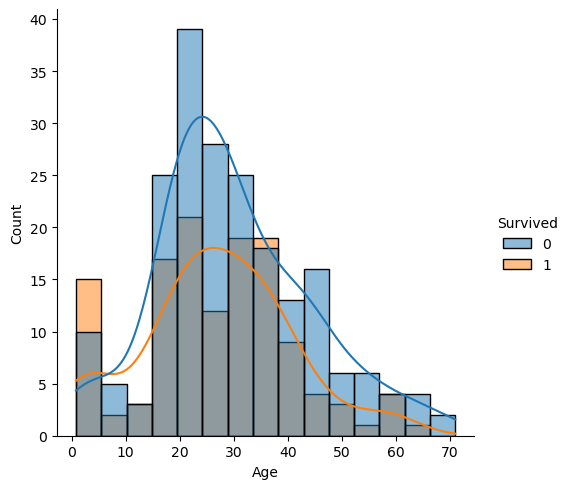

In [22]:
# Create a displot for 'Age' with hue based on 'Survived'
sns.displot(x='Age', hue='Survived', data=data, kde=True)

# Show the plot
plt.show()


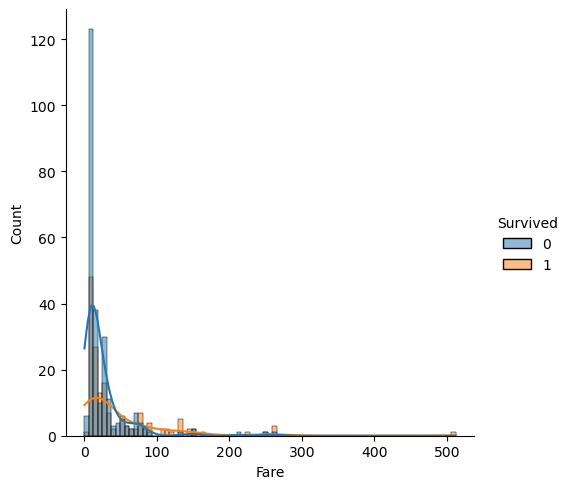

In [23]:
sns.displot(x='Fare', hue='Survived', data=data, kde=True)

# Show the plot
plt.show()


## Exploratory Data Analysis(EDA)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Category  
0      0         A/5 21171   7.2500   NaN        S        Adult  
1      0          PC 17599  71.2833   C85        C        Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S        Adult  
3      0            113803  53.1000  C123        S      

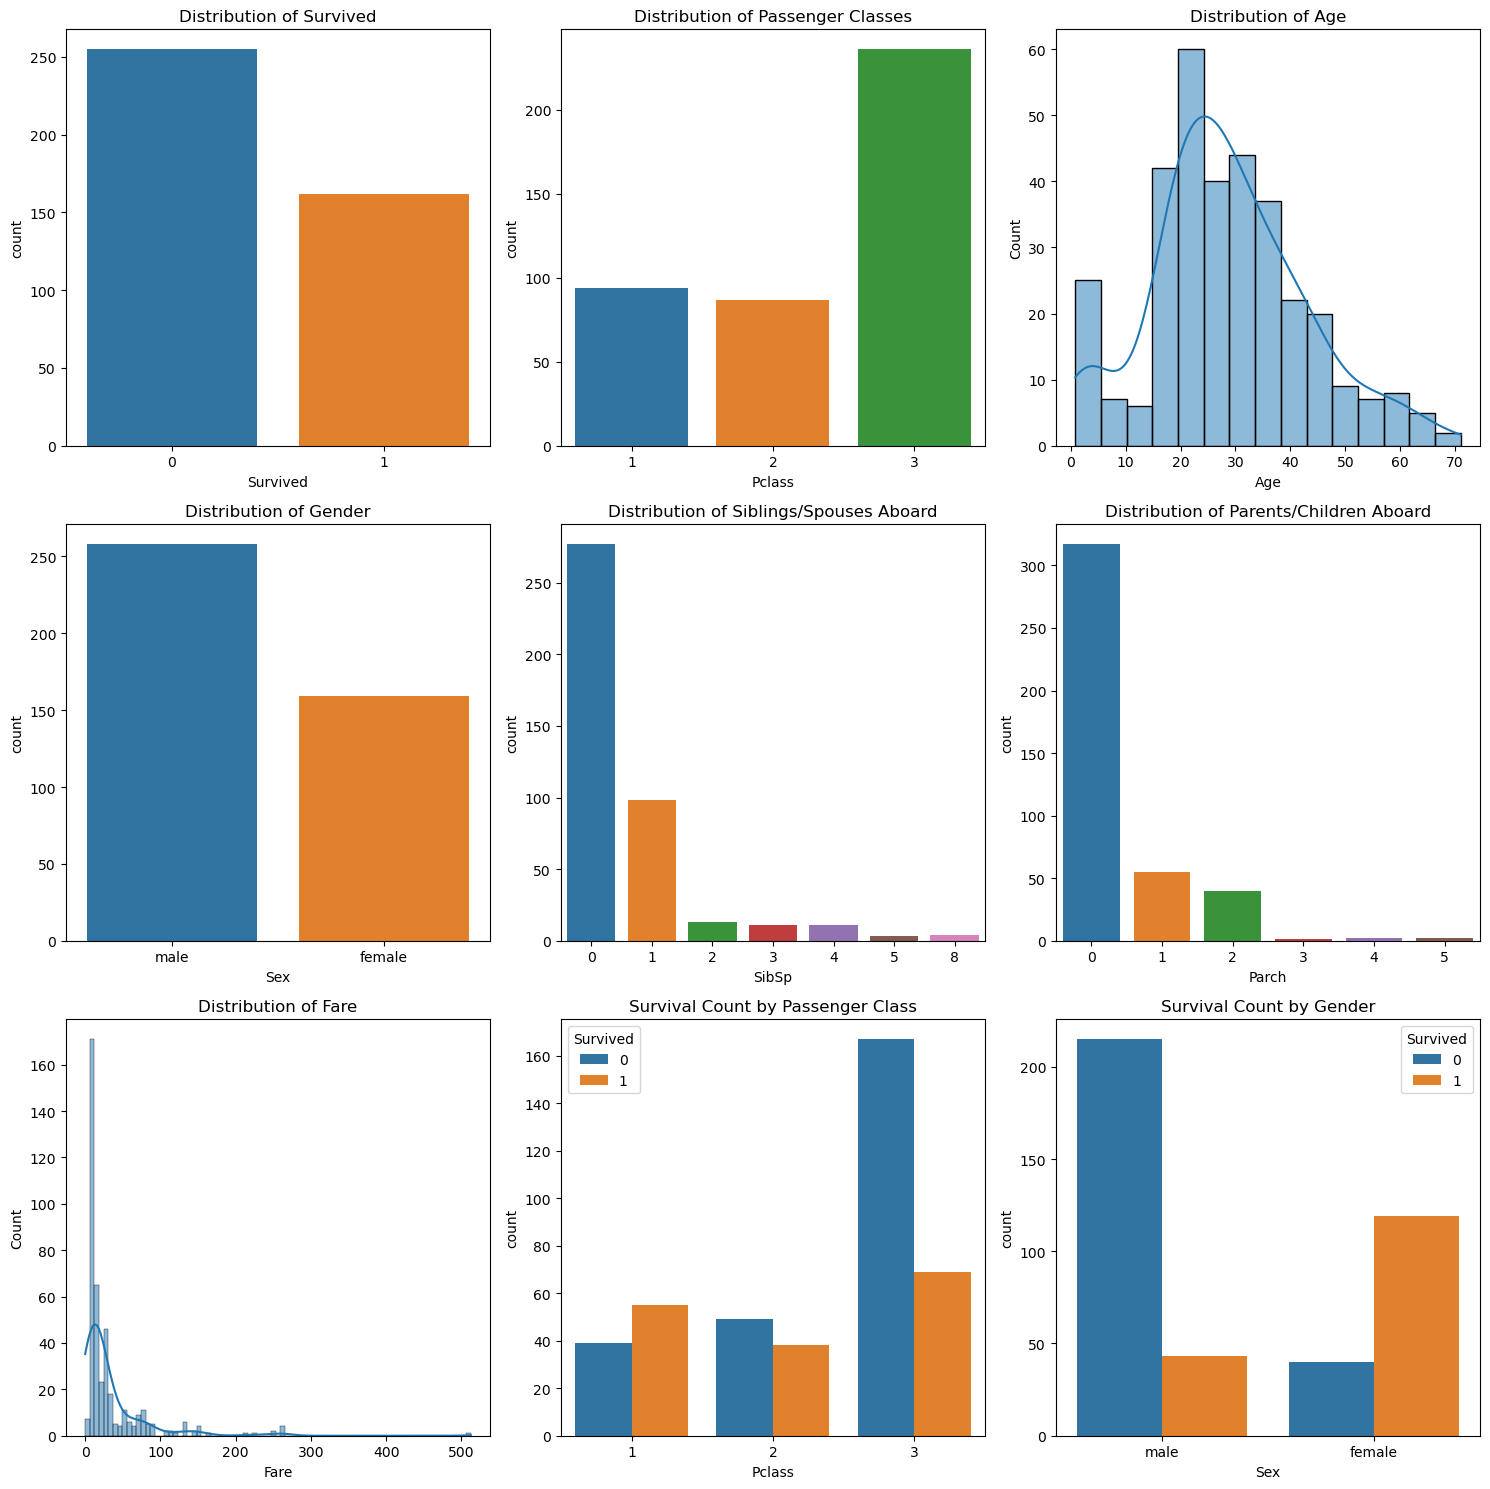

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

print(data.head())
print(data.describe())

sns.countplot(x='Survived', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survived')

sns.countplot(x='Pclass', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Passenger Classes')

sns.histplot(data['Age'].dropna(), kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Age')

sns.countplot(x='Sex', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Gender')

sns.countplot(x='SibSp', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Siblings/Spouses Aboard')

sns.countplot(x='Parch', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Parents/Children Aboard')

sns.histplot(data['Fare'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Fare')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Survival Count by Passenger Class')

sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[2, 2])
axes[2, 2].set_title('Survival Count by Gender')

# Adjust layout
plt.tight_layout()
plt.show()


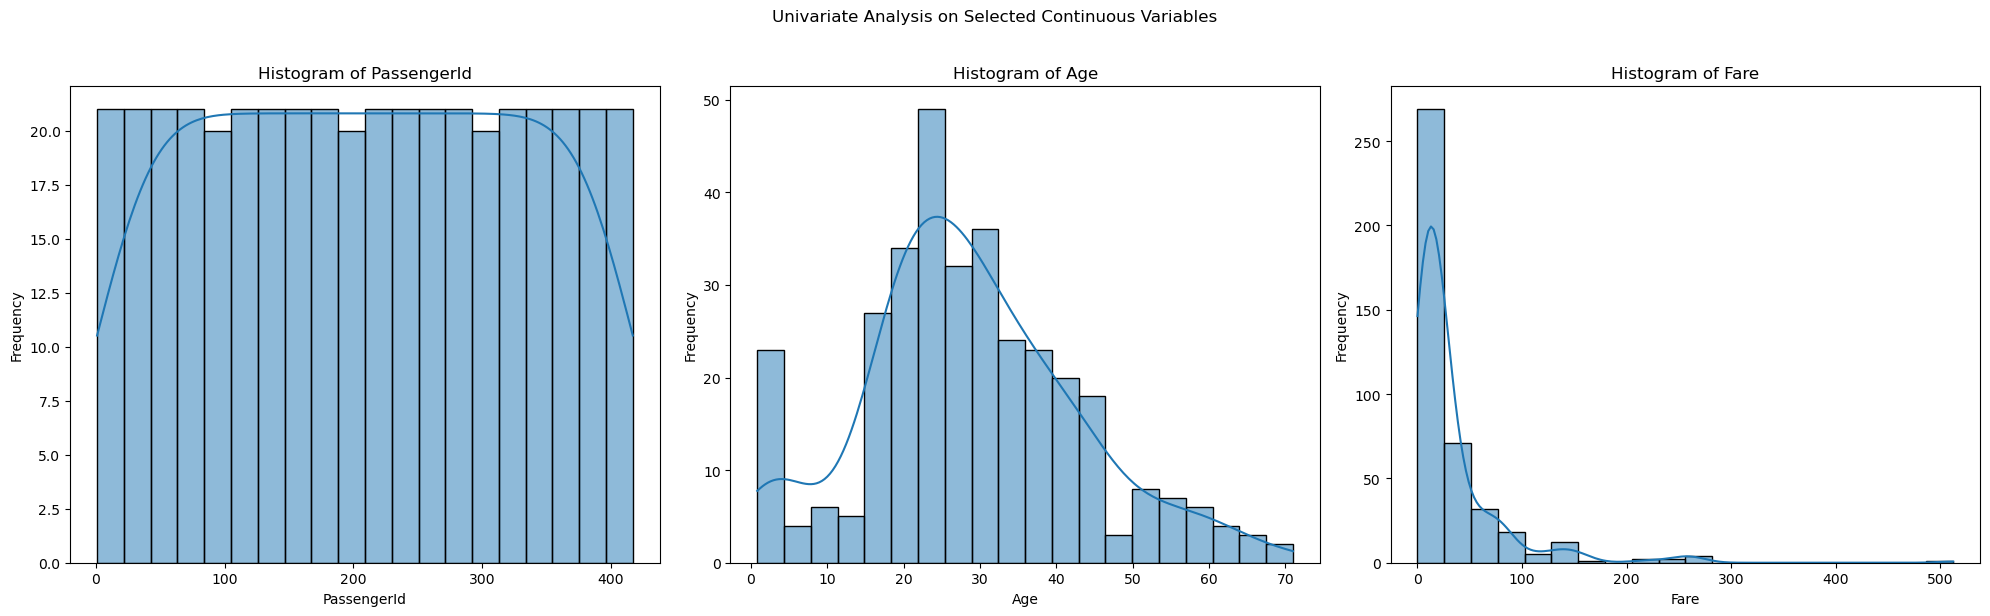

In [25]:
continuous_variables = ['PassengerId', 'Age', 'Fare']

# Create subplots for the three continuous variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Set the main title for the entire figure
fig.suptitle('Univariate Analysis on Selected Continuous Variables', y=1.02)

# Loop through the selected continuous variables and create histograms
for i, variable in enumerate(continuous_variables):
    sns.histplot(data[variable], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


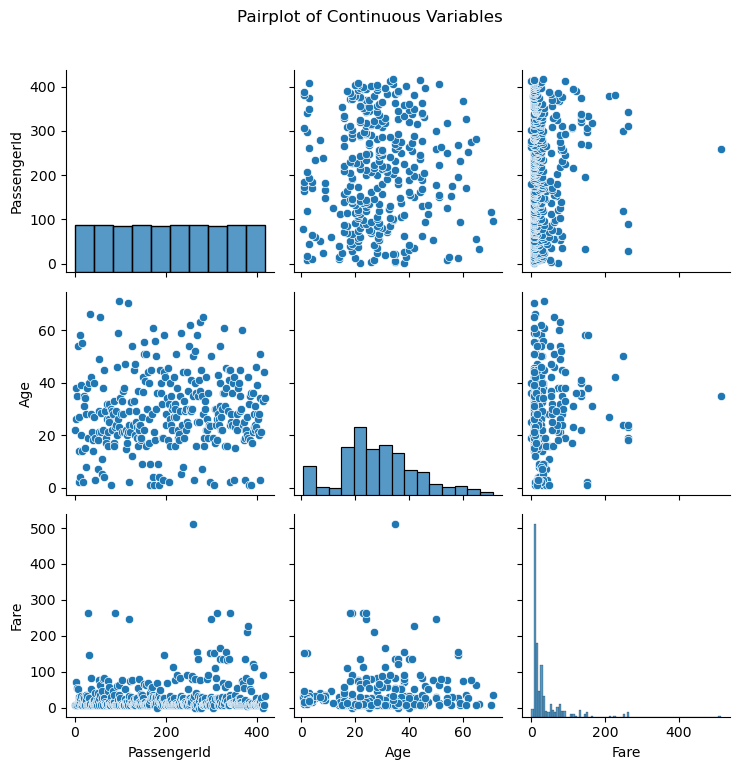

In [26]:
continuous_variables = []
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        if len(data[column].unique()) > 20:
            continuous_variables.append(column)
sns.pairplot(data[continuous_variables])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.tight_layout()
plt.show()

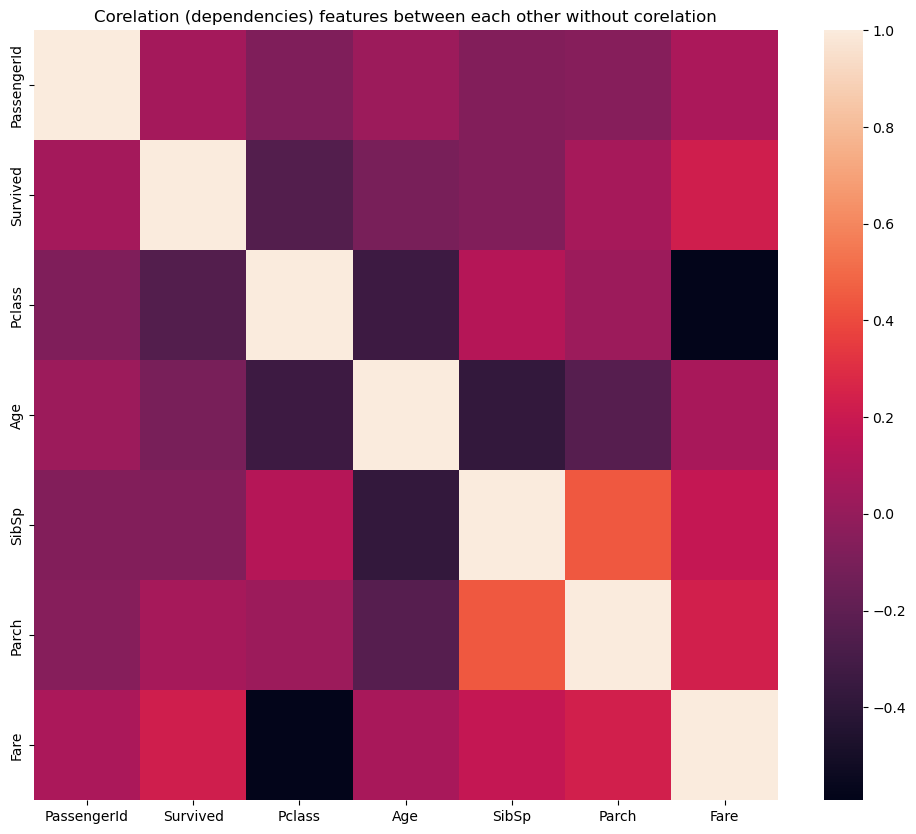

In [27]:
# Drop `Total day/eve/night/intl charge`
data.drop([f for f in data.columns if "charge" in f], axis=1, inplace=True)

# Define size of plot and title
plt.figure(figsize=(12,10))
plt.title("Corelation (dependencies) features between each other without corelation")

sns.heatmap(data.corr());

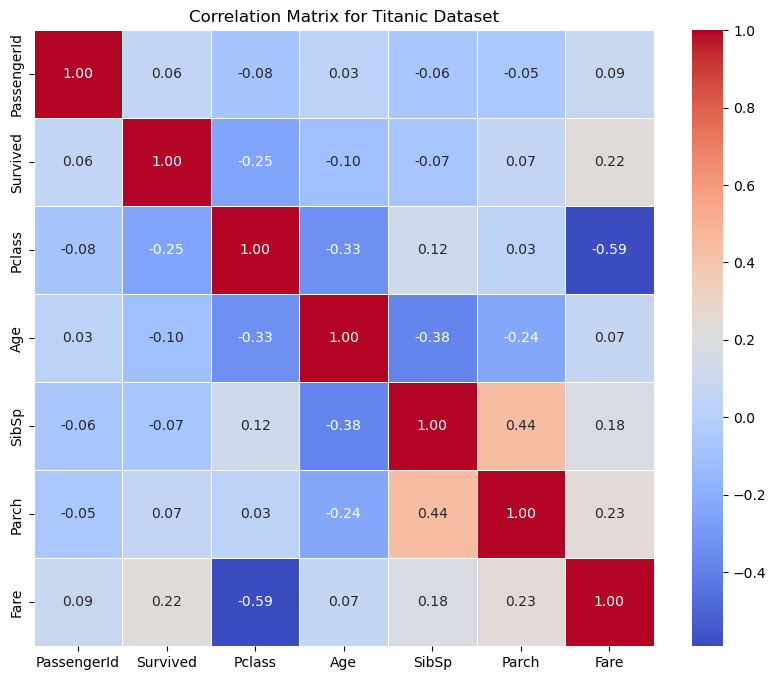

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()


## Modifying the wrong data (Data Cleaning)

In [29]:
data.isnull().sum()/len(data)*100

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             19.904077
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin           77.937650
Embarked         0.239808
Age_Category    19.904077
dtype: float64

In [30]:
data.drop(columns=['Cabin'],inplace=True)

In [31]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [32]:
data['Embarked'].value_counts()

data['Embarked'].fillna('S', inplace=True)

In [33]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category


In [34]:
data[data.duplicated()].nunique()/100


PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
Age_Category    0.0
dtype: float64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   417 non-null    int64   
 1   Survived      417 non-null    int64   
 2   Pclass        417 non-null    int64   
 3   Name          417 non-null    object  
 4   Sex           417 non-null    object  
 5   Age           417 non-null    float64 
 6   SibSp         417 non-null    int64   
 7   Parch         417 non-null    int64   
 8   Ticket        417 non-null    object  
 9   Fare          417 non-null    float64 
 10  Embarked      417 non-null    object  
 11  Age_Category  334 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 36.6+ KB


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,209.000000,0.388489,2.340528,28.711826,0.594724,0.374101,32.568374
std,120.521782,0.487992,0.822819,12.668413,1.209446,0.771550,49.378042
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,105.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,209.000000,0.000000,3.000000,28.711826,0.000000,0.000000,14.454200
75%,313.000000,1.000000,3.000000,34.000000,1.000000,0.000000,31.000000
max,417.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


## Detecting Outliers

In [37]:
data=data[data['Age']<(data['Age'].mean() + 3 * data['Age'].std())]
data.shape

(415, 12)

In [38]:
import numpy as np

# Assuming you have already loaded your DataFrame (replace 'path/to/your/data.csv' with the actual file path)
data = pd.read_csv(r"D:\train.csv")

# Calculate the first and third quartiles
Q1 = np.percentile(data['Fare'], 25)
Q3 = np.percentile(data['Fare'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['Fare'] > outlier_low) & (data['Fare'] < outlier_high)]


## Encoding

In [39]:
data['Sex'].replace({'female':0,'male':1},inplace=True)
d = pd.get_dummies(data['Embarked'],drop_first=True)
data = pd.concat((data,d),axis='columns')
data.drop(columns='Embarked',inplace=True)

In [40]:
data['Sex'].value_counts()

1    236
0    122
Name: Sex, dtype: int64

<Axes: >

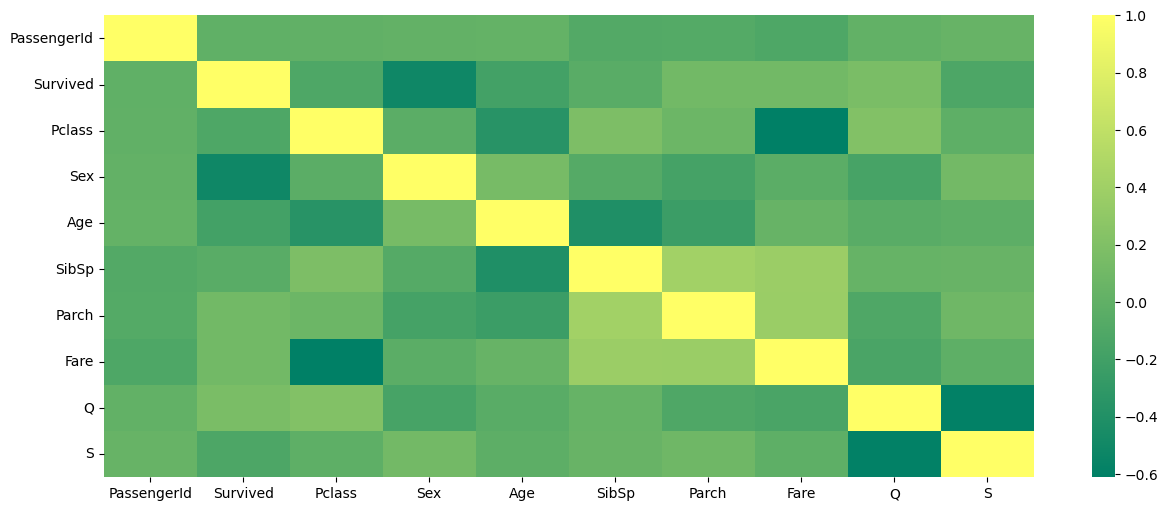

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), cmap= 'summer')

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
# Replace this with your actual data
# data = ...

# Separate features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Assuming 'Q' and 'S' are columns in your DataFrame
label_encoder = LabelEncoder()
X['Q'] = label_encoder.fit_transform(X['Q'])
X['S'] = label_encoder.fit_transform(X['S'])

print(X.dtypes)


PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Q                int64
S                int64
dtype: object


## conversion

In [45]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Q'] = data['Q'].astype('category')
data['S'] = data['S'].astype('category')


In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1,0


## transformations

In [47]:
skewness_values = data[continuous_variables].skew()
print("Skewness for Continuous Variables:")
print(skewness_values)

Skewness for Continuous Variables:
PassengerId    0.092302
Age            0.399304
Fare           1.580849
dtype: float64


In [48]:
from scipy.stats import boxcox

# Add a constant to make 'Fare' column positive
data['Fare'] = data['Fare'] + 1  # You can adjust the constant based on your specific needs

# Apply Box-Cox transformation
data['Fare'], a = boxcox(data['Fare'])

In [49]:
skewness_values = data[continuous_variables].skew()
print("Skewness for Continuous Variables:")
print(skewness_values)

Skewness for Continuous Variables:
PassengerId    0.092302
Age            0.399304
Fare           0.035274
dtype: float64


In [50]:
X = ...  # Replace this with your actual data or comment out this line if X is already defined
x_np = np.array(X)

# Print the flags attribute
print(x_np.flags)


  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



## x&y

In [51]:
X = data.drop('Survived',axis=1)
y = data['Survived']

## identify the best random state number

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)

## Machine Learning Modelling & Evaluation

## 1. Logistic Regression

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame
# Replace this with your actual data
# data = ...

# Separate features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a column transformer to handle both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_columns),  # Handle missing values in numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns with handling unknown categories
    ])

# Create a pipeline with the preprocessor and the logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Now you can use the model for predictions and evaluations
ypred_train = pipeline.predict(X_train)
ypred_test = pipeline.predict(X_test)

# Print accuracy scores
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean())
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.9370629370629371
Cross-validation score: 0.7063520871143376
Test Accuracy: 0.7083333333333334


## 2. KNN

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

# Assuming 'data' is your DataFrame
# Replace this with your actual data
# data = ...

# Separate features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a column transformer to handle both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_columns),  # Impute missing values in numeric columns with mean
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns with handling unknown categories
    ])

# Create a pipeline with the preprocessor and the KNN classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', KNeighborsClassifier())])

# Define parameter grid for GridSearchCV
param_grid = {'classifier__n_neighbors': list(range(1, 50))}

# Using accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Creating GridSearchCV
knn_grid = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)
knn_grid.fit(X_train, y_train)

# Obtaining the best estimator
knn_model = knn_grid.best_estimator_

# Predictions on training and testing data
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

# Print results
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', knn_grid.best_score_)
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.6398601398601399
Cross-validation score: 0.6433756805807622
Test Accuracy: 0.7083333333333334



## 3. Support Vector Machine (SVM)

In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the Iris dataset (you can replace this with your own dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = svm_classifier.predict(X_test)

# Calculate and print the Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate and print the Train Accuracy
y_pred_train = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

# Calculate and print the Cross-Validation Score
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
mean_cv_score = np.mean(cv_scores)
print("Cross Validation Score:", mean_cv_score)



Test Accuracy: 1.0
Train Accuracy: 0.9666666666666667
Cross Validation Score: 0.9666666666666666


## 4. Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
import pandas as pd

estimator = DecisionTreeClassifier(random_state=40)
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1, 16))}

# Using accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

dt_grid = GridSearchCV(estimator, param_grid, scoring=scorer, cv=5)
dt_grid.fit(X_train, y_train)

# Identify the best model
dt = dt_grid.best_estimator_

# Identify the importance of each feature
dt_fi = dt.feature_importances_

# Identify the feature where the feature importance is greater than 0
index = [i for i, x in enumerate(dt_fi) if x > 0]



# Train with the best model and with important features
dt.fit(X_train, y_train)

ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

# Evaluate the best model
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.9666666666666667
Cross-validation score: [1.         0.875      0.95833333 0.95833333 0.91666667]
Test Accuracy: 0.9666666666666667


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

rf = RandomForestClassifier()

df_grid = GridSearchCV(rf, param_grid, cv=5)
df_grid.fit(X_train, y_train)

# Access the best estimator
best_rf_estimator = df_grid.best_estimator_


In [58]:
estimator = DecisionTreeClassifier(random_state=40)
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1, 16))}

# Using accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

dt_grid = GridSearchCV(estimator, param_grid, scoring=scorer, cv=5)
dt_grid.fit(X_train, y_train)

# Identify the best model
dt = dt_grid.best_estimator_

# Identify the importance of each feature
dt_fi = dt.feature_importances_

# Identify the feature where the feature importance is greater than 0
index = [i for i, x in enumerate(dt_fi) if x > 0]

# Train with the best model and with important features
dt.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=3, random_state=40)

## 5. Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined
estimator = RandomForestClassifier(random_state=40)
param_grid = {'n_estimators': list(range(1, 51))}

# Using GridSearchCV for hyperparameter tuning
df_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
df_grid.fit(X_train, y_train)

# Obtaining the best RandomForest model
df = df_grid.best_estimator_

# Getting feature importances
df_fi = df.feature_importances_

# Selecting features with importance greater than 0
index = [i for i, x in enumerate(df_fi) if x > 0]

# Making predictions on training and testing data
ypred_train = df.predict(X_train)
ypred_test = df.predict(X_test)

# Printing results
print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(df, X_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 1.0
Cross-validation score: [0.95833333 0.875      0.95833333 0.91666667 0.91666667]
Test Accuracy: 1.0


## 6.  AdaBoost Classifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=40)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
df_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
df_grid.fit(X_train,y_train)

df = df_grid.best_estimator_
df_fi = df.feature_importances_

index = [i for i,x in enumerate(df_fi) if x>0]

df.fit(X_train,y_train)

ypred_train = df.predict(X_train)
ypred_test = df.predict(X_test)

print('Train Accuracy:',accuracy_score(ypred_train,y_train))
print('Cross validation score:',cross_val_score(df,X_train,y_train,cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))

Train Accuracy: 0.9666666666666667
Cross validation score: [1.         0.875      1.         0.91666667 0.91666667]
Test Accuracy: 1.0


## 7. Gradient Boost Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=40)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

from sklearn.model_selection import GridSearchCV
df_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
df_grid.fit(X_train, y_train)

df = df_grid.best_estimator_
df_fi = df.feature_importances_

index = [i for i, x in enumerate(df_fi) if x > 0]

df.fit(X_train, y_train)

ypred_train = df.predict(X_train)
ypred_test = df.predict(X_test)

print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(df, X_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 1.0
Cross-validation score: [1.         0.875      0.95833333 0.95833333 0.91666667]
Test Accuracy: 1.0


## 8. XGBoost Classifier

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, y_train, X_test, y_test are defined
estimator = XGBClassifier(random_state=40)
param_grid = {'n_estimators': list(range(1, 10)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

df_grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)
df_grid.fit(X_train, y_train)

df = df_grid.best_estimator_
df_fi = df.feature_importances_

index = [i for i, x in enumerate(df_fi) if x > 0]

df.fit(X_train, y_train)

ypred_train = df.predict(X_train)
ypred_test = df.predict(X_test)

print('Train Accuracy:', accuracy_score(ypred_train, y_train))
print('Cross-validation score:', cross_val_score(df, X_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(ypred_test, y_test))


Train Accuracy: 0.9833333333333333
Cross-validation score: [1.         0.875      0.95833333 0.91666667 0.91666667]
Test Accuracy: 1.0


# Submmission Score

In [63]:
import pandas as pd
from sklearn.svm import SVC


In [64]:
import pandas as pd

data = pd.read_csv(r"D:\train.csv")
test = pd.read_csv(r"D:\test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True) 

    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)


In [65]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
    
data.head(5)    

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Corrected Logistic Regression instantiation
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [68]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8333333333333334

In [69]:
submission_preds = clf.predict(test)

In [70]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                   "Survived": submission_preds,
                  })


In [71]:
df.to_csv("submission5.csv",index=False)